# Physics Applications Part 4

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint

## 1. Driven, Damped, Nonlinear Pendulum

### a

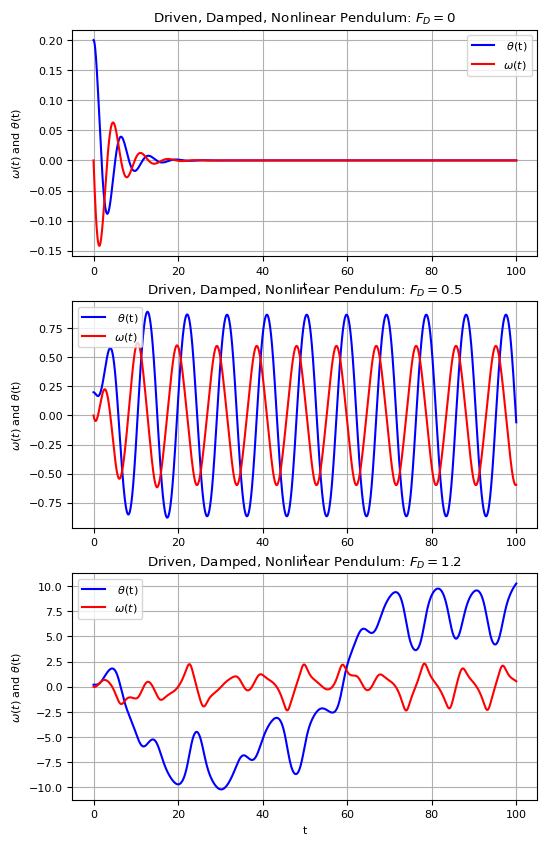

In [2]:
def f(variables, t, params):
  theta,omega=variables
  q,Fd,OmegaD=params
  dthetadt=omega
  domegadt=-gl*np.sin(theta)-q*omega+Fd*np.sin(OmegaD*t)
  return dthetadt,domegadt

a=0
b=100
N=10000
h=(b-a)/N 
t=np.arange(a,b,h)  
gl=1
q=0.5
OmegaD=2/3
Fd1=0
Fd2=0.5
Fd3=1.2
theta0=0.2
omega0=0
params1=[q,Fd1,OmegaD]
params2=[q,Fd2,OmegaD]
params3=[q,Fd3,OmegaD]
y0=[theta0,omega0]
ode1=odeint(f,y0,t,args=(params1,))
ode2=odeint(f,y0,t,args=(params2,))
ode3=odeint(f,y0,t,args=(params3,))

plt.figure(figsize=(6,10))
plt.rc('font', size=8)

plt.subplot(311)
plt.plot(t, ode1[:,0], 'b', label=r' $\theta$(t)')
plt.plot(t, ode1[:,1], 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(t, ode2[:,0], 'b', label=r' $\theta$(t)')
plt.plot(t, ode2[:,1], 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0.5$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(t, ode3[:,0], 'b', label=r' $\theta$(t)')
plt.plot(t, ode3[:,1], 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=1.2$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

### b

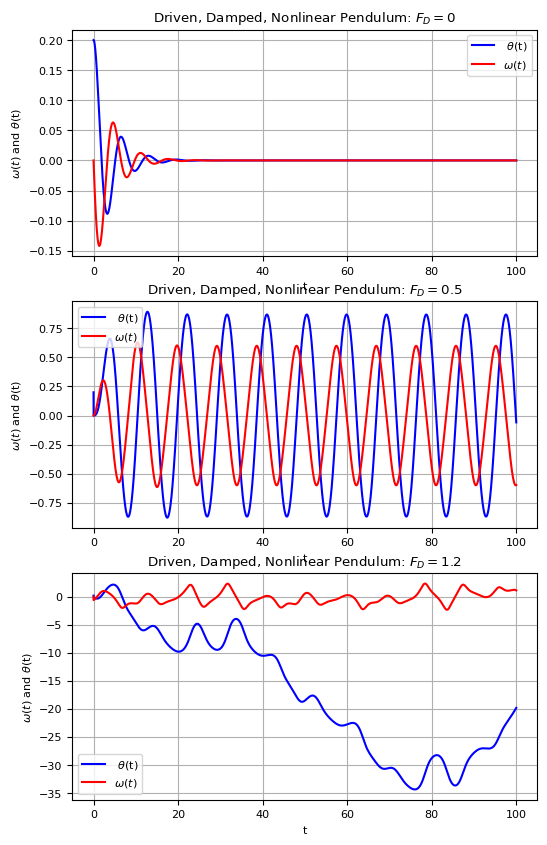

In [14]:
def f(variables, t, params):
  theta,omega=variables
  q,Fd,OmegaD=params
  dthetadt=omega
  domegadt=-gl*np.sin(theta)-q*omega+Fd*np.sin(OmegaD*t)
  return dthetadt,domegadt

a=0
b=100
N=10000
h=(b-a)/N 
t=np.arange(a,b,h)  
gl=1
q=0.5
OmegaD=2/3
Fd1=0
Fd2=0.5
Fd3=1.2
theta0=0.2
omega0=0
params1=[q,Fd1,OmegaD]
params2=[q,Fd2,OmegaD]
params3=[q,Fd3,OmegaD]
theta1=np.zeros(N)
omega1=np.zeros(N)
theta2=np.zeros(N)
omega2=np.zeros(N)
theta3=np.zeros(N)
omega3=np.zeros(N)
theta1[0]=theta0
omega1[0]=omega0
theta2[0]=theta0
omega2[0]=omega0
theta3[0]=theta0
omega3[0]=omega0

for j in range(1,N):
  variables = [theta0,omega0]
  time = h*(j-1)
  thetamid1 = theta0 + (h/2)*f(variables, time, params1)[0]
  omegamid1 = omega0 + (h/2)*f(variables, time, params1)[1]
  tmid = time + (h/2)
  thetaomegamid1 = [thetamid1,omegamid1]
  theta1[j] = theta0 + h*f(thetaomegamid1,tmid, params1)[0]
  omega1[j] = omega0 + h*f(thetaomegamid1,tmid, params1)[1]
  theta0,omega0 = theta1[j],omega1[j]

for j in range(1,N):
  variables = [theta0,omega0]
  time = h*(j-1)
  thetamid2 = theta0 + (h/2)*f(variables, time, params2)[0]
  omegamid2 = omega0 + (h/2)*f(variables, time, params2)[1]
  tmid = time + (h/2)
  thetaomegamid2 = [thetamid2,omegamid2]
  theta2[j] = theta0 + h*f(thetaomegamid2,tmid, params2)[0]
  omega2[j] = omega0 + h*f(thetaomegamid2,tmid, params2)[1]
  theta0,omega0 = theta2[j],omega2[j]

for j in range(1,N):
  variables = [theta0,omega0]
  time = h*(j-1)
  thetamid3 = theta0 + (h/2)*f(variables, time, params3)[0]
  omegamid3 = omega0 + (h/2)*f(variables, time, params3)[1]
  tmid = time + (h/2)
  thetaomegamid3 = [thetamid3,omegamid3]
  theta3[j] = theta0 + h*f(thetaomegamid3,tmid, params3)[0]
  omega3[j] = omega0 + h*f(thetaomegamid3,tmid, params3)[1]
  theta0,omega0 = theta3[j],omega3[j]    

plt.figure(figsize=(6,10))
plt.rc('font', size=8)

plt.subplot(311)
plt.plot(t, theta1, 'b', label=r' $\theta$(t)')
plt.plot(t, omega1, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(t, theta2, 'b', label=r' $\theta$(t)')
plt.plot(t, omega2, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0.5$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(t, theta3, 'b', label=r' $\theta$(t)')
plt.plot(t, omega3, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=1.2$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

-3.9089595551998
3.9577061902875172


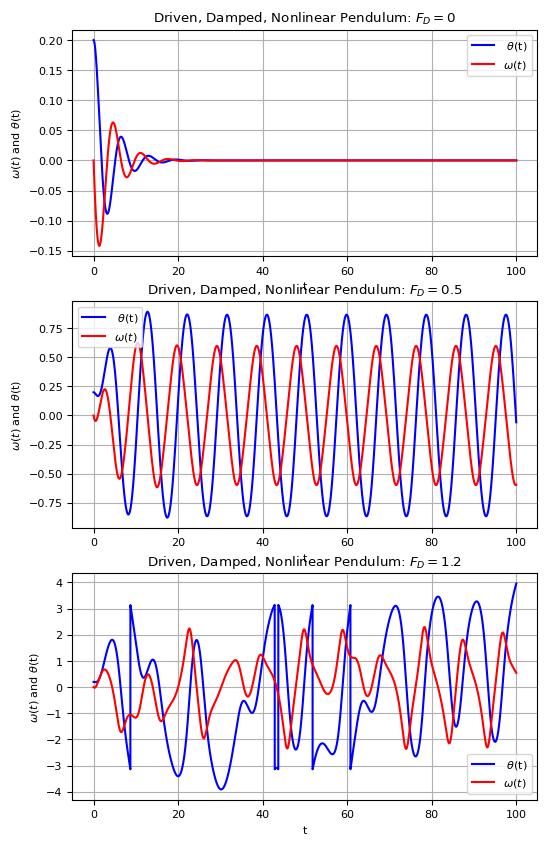

In [13]:
def f(variables, t, params):
  theta,omega=variables
  q,Fd,OmegaD=params
  dthetadt=omega
  domegadt=-gl*np.sin(theta)-q*dthetadt+Fd*np.sin(OmegaD*t)
  return dthetadt,domegadt

a=0
b=100
N=10000
h=(b-a)/N 
t=np.arange(a,b,h)  
gl=1
q=0.5
OmegaD=2/3
Fd1=0
Fd2=0.5
Fd3=1.2
theta0=0.2
omega0=0
params1=[q,Fd1,OmegaD]
params2=[q,Fd2,OmegaD]
params3=[q,Fd3,OmegaD]
y0=[theta0,omega0]
ode1=odeint(f,y0,t,args=(params1,))
ode2=odeint(f,y0,t,args=(params2,))
ode3=odeint(f,y0,t,args=(params3,))

theta1=ode1[:,0]
omega1=ode1[:,1]
theta2=ode2[:,0]
omega2=ode2[:,1]
theta3=ode3[:,0]
omega3=ode3[:,1]

theta1=np.where(theta1<-np.pi,theta1+2*np.pi,theta1)
theta1=np.where(theta1>np.pi,theta1-2*np.pi, theta1)

theta2=np.where(theta2<-np.pi,theta2+2*np.pi,theta2)
theta2=np.where(theta2>np.pi,theta2-2*np.pi, theta2)

theta3=np.where(theta3<-np.pi,theta3+2*np.pi,theta3)
theta3=np.where(theta3>np.pi,theta3-2*np.pi, theta3)
print(min(theta3)) 
print(max(theta3))  

plt.figure(figsize=(6,10))
plt.rc('font', size=8)

plt.subplot(311)
plt.plot(t, theta1, 'b', label=r' $\theta$(t)')
plt.plot(t, omega1, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(t, theta2, 'b', label=r' $\theta$(t)')
plt.plot(t, omega2, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0.5$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(t, theta3, 'b', label=r' $\theta$(t)')
plt.plot(t, omega3, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=1.2$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

###c

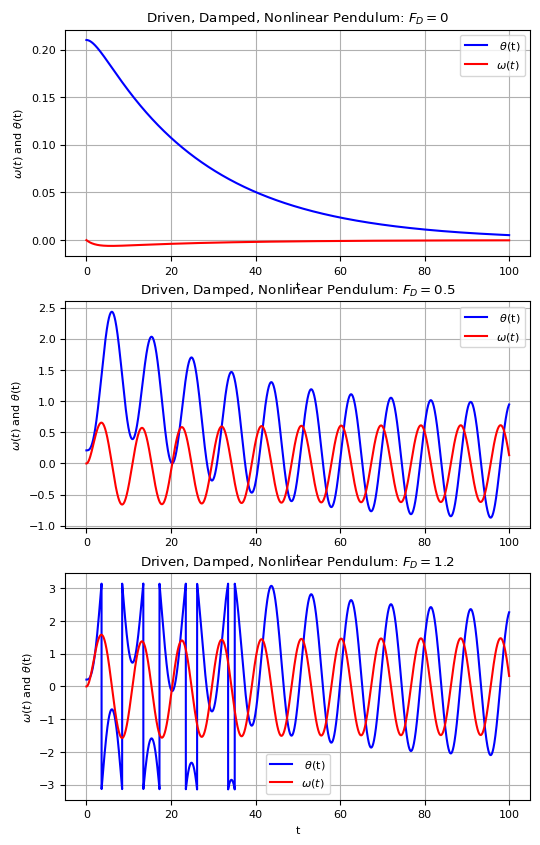

In [4]:
def f(variables, t, params):
  theta,omega=variables
  q,Fd,OmegaD=params
  theta=np.radians(theta)
  dthetadt=omega
  domegadt=-gl*np.sin(theta)-q*omega+Fd*np.sin(OmegaD*t)
  return dthetadt,domegadt

a=0
b=100
N=10000
h=(b-a)/N 
t=np.arange(a,b,h)  
gl=1
q=0.5
OmegaD=2/3
Fd1=0
Fd2=0.5
Fd3=1.2
theta0=0.21
omega0=0.0
params1=[q,Fd1,OmegaD]
params2=[q,Fd2,OmegaD]
params3=[q,Fd3,OmegaD]
y0=[theta0,omega0]
ode1=odeint(f,y0,t,args=(params1,))
ode2=odeint(f,y0,t,args=(params2,))
ode3=odeint(f,y0,t,args=(params3,))

theta11=ode1[:,0]
omega11=ode1[:,1]
theta22=ode2[:,0]
omega22=ode2[:,1]
theta33=ode3[:,0]
omega33=ode3[:,1]

theta11=np.where(theta11<-np.pi,theta11+2*np.pi,theta11)
theta11=np.where(theta11>np.pi,theta11-2*np.pi, theta11)

theta22=np.where(theta22<-np.pi,theta22+2*np.pi,theta22)
theta22=np.where(theta22>np.pi,theta22-2*np.pi, theta22)

theta33=np.where(theta33<-np.pi,theta33+2*np.pi,theta33)
theta33=np.where(theta33>np.pi,theta33-2*np.pi, theta33)

plt.figure(figsize=(6,10))
plt.rc('font', size=8)

plt.subplot(311)
plt.plot(t, theta11, 'b', label=r' $\theta$(t)')
plt.plot(t, omega1, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(t, theta22, 'b', label=r' $\theta$(t)')
plt.plot(t, omega2, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0.5$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(t, theta33, 'b', label=r' $\theta$(t)')
plt.plot(t, omega3, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=1.2$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

### d

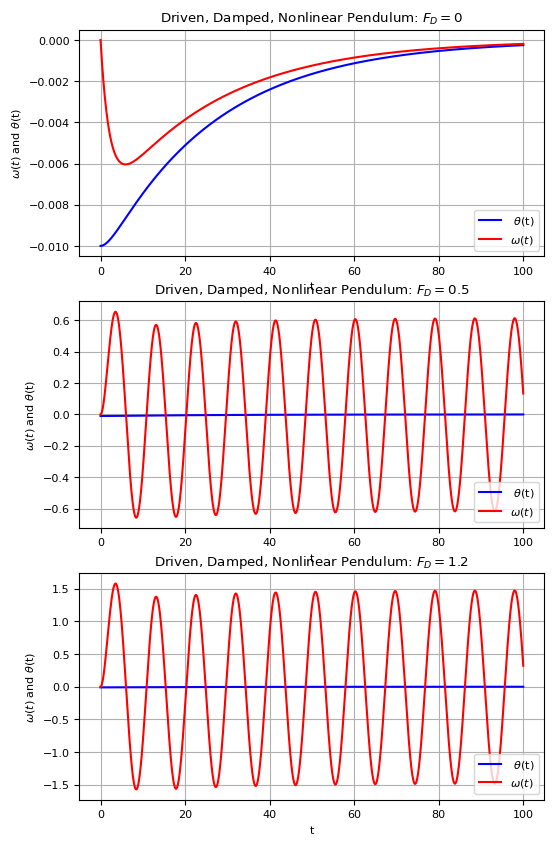

In [5]:
theta111=theta1-theta11
theta222=theta2-theta22
theta333=theta3-theta33

theta111=np.where(theta111<-np.pi,theta111+2*np.pi,theta111)
theta111=np.where(theta111>np.pi,theta111-2*np.pi, theta111)

theta222=np.where(theta222<-np.pi,theta222+2*np.pi,theta222)
theta222=np.where(theta222>np.pi,theta222-2*np.pi, theta222)

theta333=np.where(theta333<-np.pi,theta333+2*np.pi,theta333)
theta333=np.where(theta333>np.pi,theta333-2*np.pi, theta333)

plt.figure(figsize=(6,10))
plt.rc('font', size=8)

plt.subplot(311)
plt.plot(t, theta111, 'b', label=r' $\theta$(t)')
plt.plot(t, omega1, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(t, theta222, 'b', label=r' $\theta$(t)')
plt.plot(t, omega2, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=0.5$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(t, theta333, 'b', label=r' $\theta$(t)')
plt.plot(t, omega3, 'r', label=r'$\omega(t)$')
plt.title(r'Driven, Damped, Nonlinear Pendulum: $F_D=1.2$')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$ and $\theta$(t)')
plt.legend()
plt.grid()

## 2. The low-pass filter.

### a

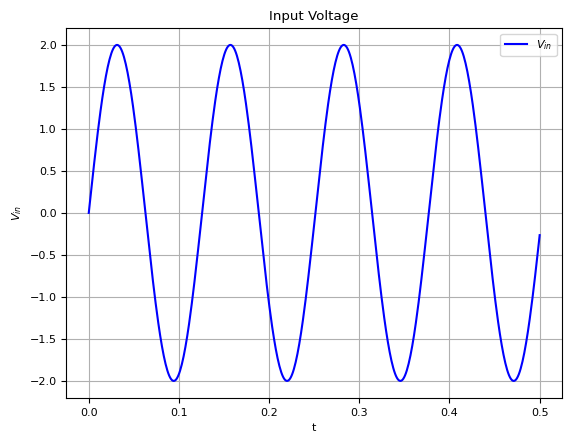

In [6]:
def Vin(t):
 return A*np.sin(omega*t)
 
A=2
omega=50
t=np.linspace(0,0.5,500)
vi = Vin(t)

plt.plot(t,vi, 'b', label=r'$V_{in}$')
plt.title('Input Voltage')
plt.xlabel('t')
plt.ylabel(r'$V_{in}$')
plt.grid()
plt.legend()
plt.show()

### b

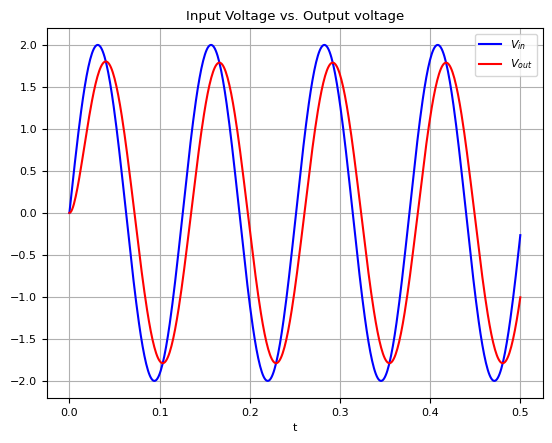

In [7]:
def f(Vout,t):
  R = 10000
  C = 0.000001
  dVodt = (Vin(t)-Vout)/(R*C)
  return dVodt

Vout0 = 0.0 
Vo = odeint(f,Vout0,t)

plt.plot(t,vi, 'b', label=r'$V_{in}$')
plt.plot(t,Vo,'r', label=r'$V_{out}$')
plt.title('Input Voltage vs. Output voltage')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

### c

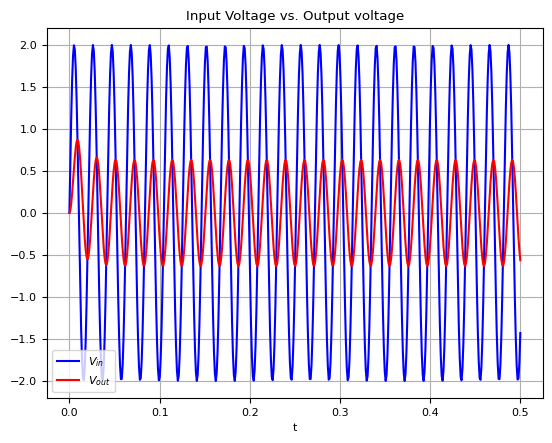

In [8]:
def Vin(t):
 return A*np.sin(omega*t)
Vout0 = 0.0
omega=300 #added an extra zero to omega
vi=Vin(t)
Vo = odeint(f,Vout0,t)

plt.plot(t,vi, 'b', label=r'$V_{in}$')
plt.plot(t,Vo,'r', label=r'$V_{out}$')
plt.title('Input Voltage vs. Output voltage')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 3. Projectile motion

2nd Order Runge-Kutta Method
x:[5.        5.0295095 5.058038  5.0855855 5.112152 ]
v:[3.     2.9019 2.8038 2.7057 2.6076]
t:[0.   0.01 0.02 0.03 0.04]


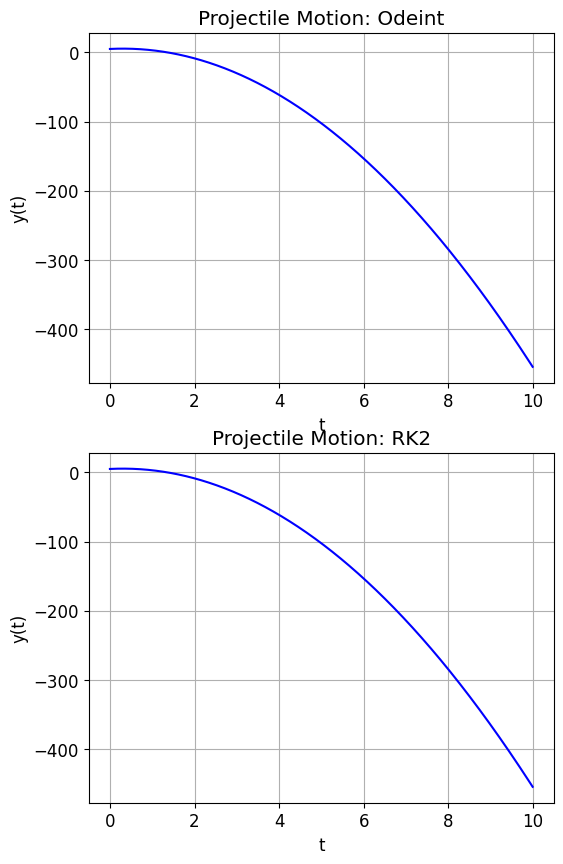

In [9]:
def f(variables,t):
  y,v=variables
  dydt=v
  Fy=-m*g
  dvdt=Fy/m
  return dydt,dvdt

m=.30
g=9.81
y0=5
v0=3.0
N=1000
a=0
b=10
h=(b-a)/N
t=np.arange(a,b,h)
y=np.zeros(N)
v=np.zeros(N)
y[0] = y0
v[0] = v0
ode=odeint(f,(y0,v0),t)

for j in range(1,N):
  variables = [y0,v0]
  time = h*(j-1)
  ymid = y0 + (h/2)*f(variables, time)[0]
  vmid = v0 + (h/2)*f(variables, time)[1]
  tmid = time + (h/2)
  yvmid = [ymid,vmid]
  y[j] = y0 + h*f(yvmid,tmid)[0]
  v[j] = v0 + h*f(yvmid,tmid)[1]
  y0,v0 = y[j],v[j]

print('2nd Order Runge-Kutta Method')    
print(f'x:{y[0:5]}\nv:{v[0:5]}\nt:{t[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(t,ode[:,0], 'b')
plt.title('Projectile Motion: Odeint')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()

plt.subplot(212)
plt.plot(t,y, 'b')
plt.title('Projectile Motion: RK2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()

## 4. Trajectory with air resistance

### a

In [10]:
def trajectory(m=1):
  def f(variables, t):
    x,vx,y,vy=variables
    v=np.sqrt(x**2+y**2)
    dxdt=vx
    dvxdt=-(0.5*np.pi*R**2*rho*C*v*vx)/m
    dydt=vy
    dvydt=-g-(0.5*np.pi*R**2*rho*C*v*vy)/m
    return dxdt,dvxdt,dydt,dvydt

  rho=1.22
  C=0.47
  R=0.08
  g=9.81
  theta=30
  theta=np.radians(theta)
  a=0
  b=10
  N=1000
  h=(b-a)/N 
  tpoints=np.arange(a,b,h)  
  x0,y0=0,0
  vx0,vy0=100,100
  vars = [x0,vx0*np.cos(theta),y0, vy0*np.sin(theta)]
  ode=odeint(f,vars,tpoints)
  return ode



### b

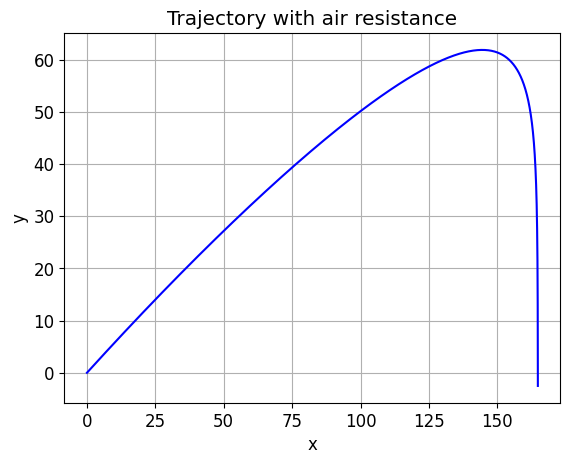

In [11]:
plt.plot(trajectory(1)[:,0], trajectory(1)[:,2], 'b-')
plt.title('Trajectory with air resistance')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()   

### c

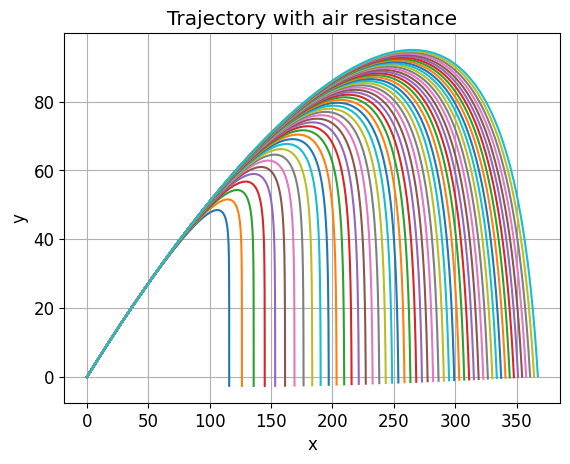

In [12]:
m_range = np.linspace(0.5,5,50)

for m in m_range:
  plt.plot(trajectory(m)[:,0], trajectory(m)[:,2])

plt.title('Trajectory with air resistance')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()  



## 5. The Lorenz equations and the butterfly effect

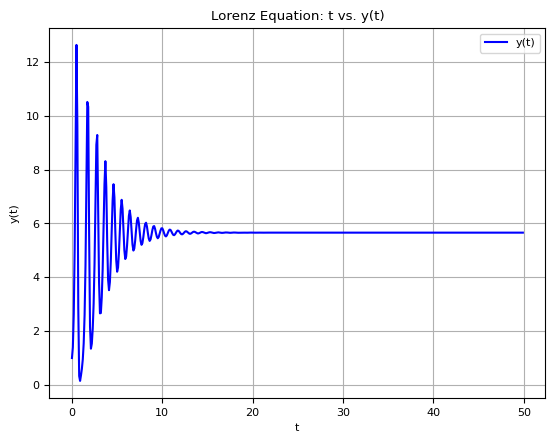

In [16]:
def lorenz(variables,t,params):
  x,y,z=variables
  sigma,rho,beta = params
  dxdt=sigma*(y-x)
  dydt=rho*x-y-x*z
  dzdt=x*y-beta*z
  return dxdt,dydt,dzdt

sigma=10
rho=13
beta=8/3
a=0
b=50
N=500
h=(b-a)/N
t=np.arange(a,b,h)
x0=0
y0=1
z0=0
variables=[x0,y0,z0]
params=[sigma,rho,beta]
ode=odeint(lorenz, variables,t ,args=(params,))
y=ode[:,1]
plt.plot(t, y,'b', label='y(t)')
plt.title('Lorenz Equation: t vs. y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.legend()
plt.show()

It looks similar to a simple harmonic oscillator in Exercise 8 question 4.